##  Import Packages

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image
import shutil
import numpy as np
import os

In [2]:
# pip freeze

In [3]:
from tensorflow.keras import utils

In [4]:
from tensorflow.keras import models

In [5]:
from tensorflow.keras import layers

In [6]:
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
from PIL import Image

## Explore Data

In [8]:
data = json.load(open("../raw_data/annotations/instances_default.json"))

In [9]:
# data

In [10]:
data.keys()

dict_keys(['licenses', 'info', 'annotations', 'images', 'categories'])

In [11]:
# data['info']

In [12]:
# data['images'][:2]

In [13]:
# data['images'][-3:-1]

In [14]:
# for image in data['images']:
#     if image['id']==3400 or image['id']==2166:
#         print('file name', image['file_name'])

In [15]:
# pip install --upgrade Pillow

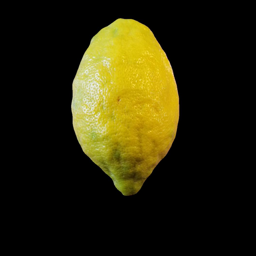

In [16]:

image2 = Image.open('../raw_data/classified_images/Train_lemon/Healthy_lemon/0002_D_V_75_G.jpg')
image2 = image2.resize((256,256))
image2

In [17]:
dict_keys=['licenses', 'info', 'annotations', 'images', 'categories']

In [18]:
type(data['annotations'])

list

In [19]:
len(data['annotations'])

33753

In [20]:
len(data['images'])

2690

In [21]:
annotations = data['annotations']

In [22]:
for dicts in annotations:
#     print('id',dicts['id'],'image_id', dicts['image_id'],'category',dicts['category_id'])
    
    if dicts['category_id'] == 8:
        print('healthy',dicts['image_id'])

healthy 2166
healthy 3400


## Merge Category with image #
Found multiple categories PER image
Only 2 images had category =8 meaning 'healthy' and those are image_id 2166 & 3400 but these images have other categories as well

In [23]:
data['categories']

[{'id': 1, 'supercategory': '', 'name': 'image_quality'},
 {'id': 2, 'supercategory': '', 'name': 'illness'},
 {'id': 3, 'supercategory': '', 'name': 'gangrene'},
 {'id': 4, 'supercategory': '', 'name': 'mould'},
 {'id': 5, 'supercategory': '', 'name': 'blemish'},
 {'id': 6, 'supercategory': '', 'name': 'dark_style_remains'},
 {'id': 7, 'supercategory': '', 'name': 'artifact'},
 {'id': 8, 'supercategory': '', 'name': 'condition'},
 {'id': 9, 'supercategory': '', 'name': 'pedicel'}]

In [24]:
rows = [[dicts['id'],dicts['area'], dicts['image_id'],dicts['category_id']] for dicts in annotations]

In [25]:
df = pd.DataFrame(rows, columns=["Annot_id","area","image_id","category"])
df

,Annot_id,area,image_id,category
0,1,539.0,0,9
1,2,622.0,0,5
2,3,809.0,0,5
3,4,30.0,100,5
4,5,31.0,100,2
...,...,...,...,...
33748,33749,1517.0,6502,5
33749,33750,75.0,6502,5
33750,33751,760.0,6502,5
33751,33752,84.0,6502,5


Text(0.5, 0, 'no. of categories')

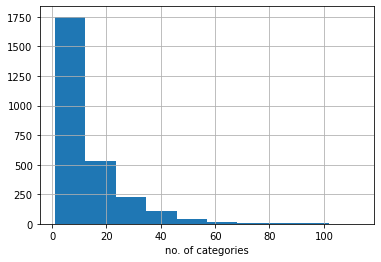

In [26]:
df.groupby(['image_id']).size().hist()
plt.xlabel('no. of categories')
#shows how many images have how many categories, most have 1 to 10, a small number have more than 80 categories!

In [27]:
category_ = df.groupby('image_id').apply(lambda group: group['category'].unique())

In [28]:
category_.map(sorted)

image_id
0          [5, 9]
100     [2, 5, 7]
101     [2, 5, 9]
102     [2, 5, 7]
103        [5, 9]
          ...    
6098          [4]
6099          [4]
6500    [2, 5, 7]
6501       [4, 5]
6502       [4, 5]
Length: 2690, dtype: object

In [29]:
# len(df['image_id'].unique())

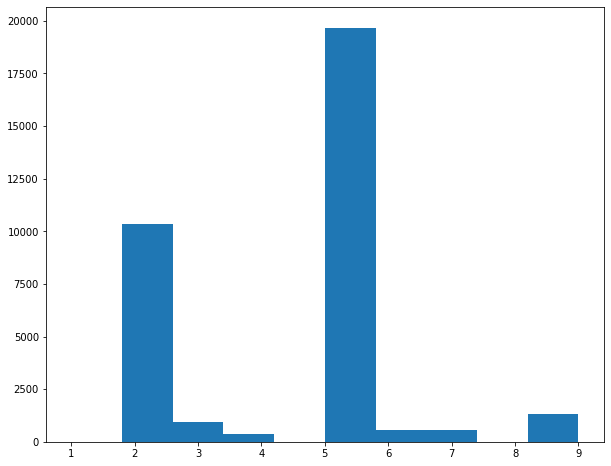

In [30]:
plt.figure(figsize=(10,8))
plt.hist(df['category']);

In [31]:
# len(data['licenses'])

In [32]:
# len(data['info'])

In [33]:
# df[df['image_id']==100]

In [34]:
images = data['images']
images

[{'id': 0,
  'date_captured': 0,
  'coco_url': '',
  'file_name': 'images/0001_A_H_0_A.jpg',
  'license': 0,
  'flickr_url': '',
  'height': 1056,
  'width': 1056},
 {'id': 100,
  'date_captured': 0,
  'coco_url': '',
  'file_name': 'images/0003_A_V_150_A.jpg',
  'license': 0,
  'flickr_url': '',
  'height': 1056,
  'width': 1056},
 {'id': 101,
  'date_captured': 0,
  'coco_url': '',
  'file_name': 'images/0003_A_V_15_A.jpg',
  'license': 0,
  'flickr_url': '',
  'height': 1056,
  'width': 1056},
 {'id': 102,
  'date_captured': 0,
  'coco_url': '',
  'file_name': 'images/0003_A_V_165_A.jpg',
  'license': 0,
  'flickr_url': '',
  'height': 1056,
  'width': 1056},
 {'id': 103,
  'date_captured': 0,
  'coco_url': '',
  'file_name': 'images/0003_A_V_30_A.jpg',
  'license': 0,
  'flickr_url': '',
  'height': 1056,
  'width': 1056},
 {'id': 104,
  'date_captured': 0,
  'coco_url': '',
  'file_name': 'images/0003_A_V_45_A.jpg',
  'license': 0,
  'flickr_url': '',
  'height': 1056,
  'width': 

In [35]:
image_rows = [[image['id'],image['file_name']] for image in images]

In [36]:
# image_rows2 = [[image['id'],image['file_name'].split('/')[-1]] for image in images]

In [37]:
# image_rows2[:5]

In [38]:
image_df = pd.DataFrame(image_rows, columns = ['image_id','file_name'])
image_df

,image_id,file_name
0,0,images/0001_A_H_0_A.jpg
1,100,images/0003_A_V_150_A.jpg
2,101,images/0003_A_V_15_A.jpg
3,102,images/0003_A_V_165_A.jpg
4,103,images/0003_A_V_30_A.jpg
...,...,...
2685,6098,images/0023_G_H_135_F.jpg
2686,6099,images/0023_G_H_150_F.jpg
2687,6500,images/0037_G_I_0_A.jpg
2688,6501,images/0037_G_I_105_A.jpg


In [39]:
merged_df = df.merge(image_df)
merged_df.head()

,Annot_id,area,image_id,category,file_name
0,1,539.0,0,9,images/0001_A_H_0_A.jpg
1,2,622.0,0,5,images/0001_A_H_0_A.jpg
2,3,809.0,0,5,images/0001_A_H_0_A.jpg
3,4,30.0,100,5,images/0003_A_V_150_A.jpg
4,5,31.0,100,2,images/0003_A_V_150_A.jpg


In [40]:
merged_df[merged_df['file_name']=="images/0002_G_I_45_A.jpg"]

,Annot_id,area,image_id,category,file_name
32040,32041,15.0,5499,2,images/0002_G_I_45_A.jpg
32041,32042,68707.0,5499,4,images/0002_G_I_45_A.jpg


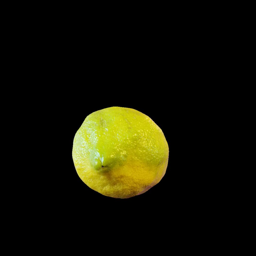

In [41]:
image2 = Image.open('../raw_data/images/0005_D_H_165_C.jpg')
image2 = image2.resize((256,256))
image2

In [42]:
merged_df[merged_df['file_name']=="images/0005_D_H_165_C.jpg"].groupby('category').sum('area')

,Annot_id,area,image_id
category,,,
5,115763,1582.0,16698
9,19295,119.0,2783


# 006_A/H - look healthy but got moved to unhealthy

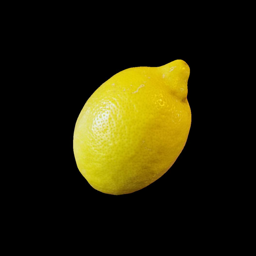

In [43]:
image2 = Image.open('../raw_data/images/0006_A_I_105_C.jpg')
image2 = image2.resize((256,256))
image2

In [44]:
merged_df[merged_df['file_name']=="images/0006_A_I_105_C.jpg"].groupby('category').sum('area')

,Annot_id,area,image_id
category,,,
2,753,1590.0,364
5,4438,1252.0,2184
9,374,32.0,182


In [45]:
# merged_df[merged_df['file_name']=="images/0001_E_H_0_C.jpg"]

In [46]:
# merged_df[merged_df['file_name']=="images/0008_D_I_135_A.jpg"].groupby('category').sum('area')

In [47]:
# merged_df[merged_df['file_name']=="images/0016_C_H_90_F.jpg"].groupby('category').sum('area')

## Healthy lemons

In [48]:
image2 = Image.open('../raw_data/classified_images/Train_lemon/Healthy_lemon/0001_F_I_0_C.jpg')
image2 = image2.resize((256,256))
image2

FileNotFoundError: [Errno 2] No such file or directory: '../raw_data/classified_images/Train_lemon/Healthy_lemon/0001_F_I_0_C.jpg'

In [ ]:
merged_df[merged_df['file_name']=="images/0001_F_I_0_C.jpg"].groupby('category').sum('area')

In [ ]:
image2 = Image.open('../raw_data/classified_images/Train_lemon/Healthy_lemon/0003_C_H_165_G.jpg')
image2 = image2.resize((256,256))
image2

In [ ]:
merged_df[merged_df['file_name']=="images/0003_C_H_165_G.jpg"].groupby('category').sum('area')

In [ ]:
image2 = Image.open('../raw_data/classified_images/Train_lemon/Healthy_lemon/0003_C_I_135_G.jpg')
image2 = image2.resize((256,256))
image2

In [49]:
merged_df[merged_df['file_name']=="images/0003_C_I_135_G.jpg"].groupby('category').sum('area')

,Annot_id,area,image_id
category,,,
5,115920,121452.0,23777
7,8911,112.0,1829


## unhealthy lemons

In [ ]:
image2 = Image.open('../raw_data/classified_images/Train_lemon/Unhealthy_lemon/0016_C_V_30_F.jpg')
image2 = image2.resize((256,256))
image2

In [ ]:
merged_df[merged_df['file_name']=="images/0016_C_V_30_F.jpg"].groupby('category').sum('area')

In [ ]:
image2 = Image.open('../raw_data/classified_images/Train_lemon/Unhealthy_lemon/0002_B_V_30_G.jpg')
image2 = image2.resize((256,256))
image2

In [ ]:
merged_df[merged_df['file_name']=="images/0002_B_V_30_G.jpg"].groupby('category').sum('area')

In [ ]:
image2 = Image.open('../raw_data/classified_images/Train_lemon/Unhealthy_lemon/0001_F_H_75_C.jpg')
image2 = image2.resize((256,256))
image2

In [ ]:
merged_df[merged_df['file_name']=="images/0001_F_H_75_C.jpg"].groupby('category').sum('area')

In [ ]:
image2 = Image.open('../raw_data/classified_images/Train_lemon/Unhealthy_lemon/0003_A_V_90_A.jpg')
image2 = image2.resize((256,256))
image2

In [ ]:
merged_df[merged_df['file_name']=="images/0003_A_V_90_A.jpg"].groupby('category').sum('area')

In [ ]:
image2 = Image.open('../raw_data/classified_images/Train_lemon/Unhealthy_lemon/0003_B_V_60_G.jpg')
image2 = image2.resize((256,256))
image2

In [ ]:
merged_df[merged_df['file_name']=="images/0003_B_V_60_G.jpg"].groupby('category').sum('area')

In [ ]:
# healthy_list = os.listdir('../raw_data/classified_images/Train_lemon/Healthy_lemon')

In [ ]:
# data = []
# for file_name in healthy_list:
#     cat_df = merged_df.loc[merged_df['file_name'] == f"images/{file_name}"].groupby('category').sum('area')
# #     print(cat_df, type(cat_df))
#     for idx in cat_df.index:
#         if idx == 5:
#             cat_list = cat_df.loc[idx].values.tolist()
# #             print(file_name, cat_list)
#             data.append([file_name, cat_list[1]])

In [ ]:
# healthy_df= pd.DataFrame(data, columns=["file_name","area"])

In [ ]:
# healthy_df

In [ ]:
# plt.hist(healthy_df['area'], bins=100);

In [ ]:
# blemish_df = healthy_df[healthy_df['area']>60000]
# blemish_df

In [ ]:
# blemish_list = blemish_df['file_name'].tolist()
# blemish_list

In [ ]:
# count = 0
# for file_name in blemish_list:
#     count+=1
#     image_ = Image.open(f'../raw_data/classified_images/Train_lemon/healthy_lemon/{file_name}')
#     image_ = image_.resize((256,256))
#     display(image_)
# print("total blemished imgs", count)

In [ ]:
# unhealthy_list = os.listdir('../raw_data/classified_images/Train_lemon/Unhealthy_lemon')

In [ ]:
# len(unhealthy_list)

In [ ]:
# data_unhealthy = []
# for file_name in unhealthy_list:
#     cat_df = merged_df.loc[merged_df['file_name'] == f"images/{file_name}"].groupby('category').sum('area')
#     cat_idx = cat_df.index.tolist()
#     print(cat_idx, cat_df)
#     if any(x in cat_idx for x in [3, 4]):
#         print('found 3 or 4')
#         pass
#     else:
#         print('no 3 or 4')
#         data_unhealthy.append(file_name)

# print(data_unhealthy)


            

In [ ]:
# data = []
# for file_name in data_unhealthy:
#     cat_df = merged_df.loc[merged_df['file_name'] == f"images/{file_name}"].groupby('category').sum('area')
#     for idx in cat_df.index:
#         if idx == 2:
#             cat_list = cat_df.loc[idx].values.tolist()
#             data.append([file_name, cat_list[1]])

In [ ]:
# unhealthy_df= pd.DataFrame(data, columns=["file_name","area"])

In [ ]:
# unhealthy_df

In [ ]:
# plt.figure(figsize=(18,6))
# plt.xlim(0,10000)
# plt.hist(unhealthy_df['area'], bins=100);

In [ ]:
# illness_df = unhealthy_df[unhealthy_df['area']>1600]
# illness_df

In [ ]:
# illness_list = illness_df['file_name'].tolist()
# illness_list

In [ ]:
# count = 0
# for file_name in illness_list:
#     count+=1
#     image_ = Image.open(f'../raw_data/classified_images/Train_lemon/Unhealthy_lemon/{file_name}')
#     image_ = image_.resize((256,256))
#     display(image_)
#     print(file_name)
# #     if count >10:
# #         break
# print("total blemished imgs", count)

## create a list of filenames

In [50]:
files=merged_df['file_name'].unique().tolist()
len(files)

2690

In [51]:
files

['images/0001_A_H_0_A.jpg',
 'images/0003_A_V_150_A.jpg',
 'images/0003_A_V_15_A.jpg',
 'images/0003_A_V_165_A.jpg',
 'images/0003_A_V_30_A.jpg',
 'images/0003_A_V_45_A.jpg',
 'images/0003_A_V_60_A.jpg',
 'images/0003_A_V_75_A.jpg',
 'images/0003_A_V_90_A.jpg',
 'images/0004_A_H_0_A.jpg',
 'images/0004_A_H_105_A.jpg',
 'images/0004_A_H_120_A.jpg',
 'images/0004_A_H_135_A.jpg',
 'images/0004_A_H_150_A.jpg',
 'images/0004_A_H_15_A.jpg',
 'images/0004_A_H_165_A.jpg',
 'images/0004_A_H_30_A.jpg',
 'images/0004_A_H_45_A.jpg',
 'images/0004_A_H_60_A.jpg',
 'images/0004_A_H_75_A.jpg',
 'images/0004_A_H_90_A.jpg',
 'images/0004_A_I_0_A.jpg',
 'images/0004_A_I_105_A.jpg',
 'images/0004_A_I_120_A.jpg',
 'images/0004_A_I_135_A.jpg',
 'images/0004_A_I_150_A.jpg',
 'images/0004_A_I_15_A.jpg',
 'images/0004_A_I_165_A.jpg',
 'images/0004_A_I_30_A.jpg',
 'images/0004_A_I_45_A.jpg',
 'images/0004_A_I_60_A.jpg',
 'images/0004_A_I_75_A.jpg',
 'images/0004_A_I_90_A.jpg',
 'images/0004_A_V_0_A.jpg',
 'imag

## Split the images into Train and Test sets

In [52]:
import random
random.seed(2)
random.shuffle(files)

train_img = files[:int(len(files)*.70)+1] 

test_img= files[int(len(files)*.70)+1:] 

In [ ]:
# list1=list(range(1,2691,1))
# list1[:2],list1[-3:]

In [ ]:
# train=int(len(list1)*0.7)

In [ ]:
# train_list = list1[:train+1]
# train_list[-1]

In [ ]:
# len(train_list)

In [ ]:
# test_list = list1[train+1:]
# test_list[-1], test_list[:2]

In [ ]:
# len(test_list)

## Create Function to classify unhealthy and healthy lemon images

In [ ]:
# def classify_category(merged_df,file_name):
#     targeted=merged_df.loc[merged_df['file_name'] == file_name].groupby('category').sum('area')
#     result=[]
#     for idx in targeted.index:
#         if idx in [2,3,4]:
#             result.append(True)
#         else:
#             result.append(False)
#     if any(result):
#         return("Unhealthy_lemon")
#     else:
#         return("Healthy_lemon")

In [ ]:
def classify_category(merged_df,file_name):
    targeted=merged_df.loc[merged_df['file_name'] == file_name].groupby('category').sum('area')
    result=[]
    cat_idx = targeted.index.tolist()
    if any(x in cat_idx for x in [3, 4]):
        result.append(True)
    elif any(x in cat_idx for x in [2,5]):
        for idx in cat_idx:
            if idx == 2 and targeted.loc[idx].area > 140 :
                result.append(True)
            if idx == 5 and targeted.loc[idx].area > 13000:
                result.append(True)
    else:
        result.append(False)
        
    if any(result):
        return("Unhealthy_lemon")
    else:
        return("Healthy_lemon")

In [ ]:
####blank out once folders created####

# for file in train_img:
#         shutil.copy2(f"../raw_data/{file}",f"../raw_data/classified_images/Train_lemon/{classify_category(merged_df,file)}/{file.split('/')[-1]}")

In [ ]:
####blank out once folders created####
# for file in test_img:
#     shutil.copy2(f"../raw_data/{file}",f"../raw_data/classified_images/Test_lemon/{classify_category(merged_df,file)}/{file.split('/')[-1]}")

In [ ]:
####This is for when you only need Health vs Unhealthy folders ####
# for file in files:
#     shutil.copy2(f"../raw_data/{file}",
#                  f"../raw_data/classified_images/{classify_category(merged_df,file)}/{file.split('/')[-1]}") 
#####use below cells to create 2 folders(via terminal) with Train and Test and then Healthy and unhealthy

In [ ]:
trh = len(os.listdir("../raw_data/classified_images/Train_lemon/Healthy_lemon"))
trh

In [ ]:
truh = len(os.listdir("../raw_data/classified_images/Train_lemon/Unhealthy_lemon"))
truh

In [ ]:
tsh = len(os.listdir("../raw_data/classified_images/Test_lemon/Healthy_lemon"))
tsh

In [ ]:
tsuh = len(os.listdir("../raw_data/classified_images/Test_lemon/Unhealthy_lemon"))
tsuh

In [ ]:
trh+truh+tsh+tsuh
#less than 2690 b/c removed some odd images out

## Make a baseline model

In [ ]:
#Use this method to quickly read a small number of images
# filepath = os.listdir("..raw_data/classified_images/Train_lemon/Healthy_lemon") # a folder of some images
# filepath

In [ ]:
# lemon_data = []
# for file in filepath:
#     lemon_data.append(image.imread(f'..raw_data/classified_images/Train_lemon/Healthy_lemon/{file}'))

In [ ]:
# lemon_data = utils.image_dataset_from_directory('..raw_data/classified_images/Train_lemon')
#this should give you a list of how many files per category eg healthy or unhealthy

In [ ]:
def strip_black_from_image(img):

    x_id = np.argwhere(np.max(img, axis = (1, 2)) > 0).reshape(-1)

    strip_img = img[x_id]
    
    y_id = np.argwhere(np.max(strip_img, axis = (0, 2)) > 0).reshape(-1)

    return strip_img[:, y_id]

In [ ]:
test_img=np.array(Image.open('../raw_data/classified_images/Train_lemon/Healthy_lemon/0003_A_V_90_A.jpg'))
stripped_img = strip_black_from_image(test_img)
plt.imshow(stripped_img)

In [ ]:
stripped_img.shape

In [ ]:
normal_img = stripped_img/255

In [ ]:
normal_img.max()

In [ ]:
normal_img.shape

In [ ]:
plt.imshow(normal_img)

In [53]:
train_data = utils.image_dataset_from_directory('../raw_data/class_images_min/Train_lemon', seed = 1,validation_split = 0.3, subset = 'training')

Found 1873 files belonging to 2 classes.
Using 1312 files for training.


2022-08-25 20:11:30.454923: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [54]:
validation_data = utils.image_dataset_from_directory('../raw_data/class_images_min/Train_lemon', seed =1, validation_split = 0.2, subset = 'validation')

Found 1873 files belonging to 2 classes.
Using 374 files for validation.


In [55]:
def initialize_model():

    model = models.Sequential()
    
    model.add(layers.Rescaling(1/255))
    ### Augmentation Layer before Model
    model.add(layers.RandomFlip())
    
    ### Resizing layer before Model
    model.add(layers.Resizing(512,512))#,input_shape=(256, 256, 3) you only need input_shape if you want model.summary()

    ### First Convolution & MaxPooling
    model.add(layers.Conv2D(8, (28,28), activation='relu', padding='same', input_shape=(512,512,3)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    ### Second Convolution & MaxPooling
    model.add(layers.Conv2D(16, (16,16), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    ## Extra Layers just for fun ##
    model.add(layers.Conv2D(64, (8,8), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    ### Flattening
    model.add(layers.Flatten())
    
    ### TWO Fully Connected layer - "Fully Connected" is equivalent to saying "Dense"
    model.add(layers.Dense(96, activation='relu'))
    model.add(layers.Dense(12, activation='relu'))
    
    ### Last layer - Classification Layer with 1 output corresponding to healthy vs unhealthy
    model.add(layers.Dense(1, activation='sigmoid'))
    
    ### Model compilation
    model.compile(loss='binary_crossentropy',  #'sparse_categorical_crossentropy'
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model

In [56]:
model = initialize_model()
# model.summary()

In [57]:
es = EarlyStopping(patience = 5, restore_best_weights=True)

histroy = model.fit(train_data, 
          batch_size=8, 
          epochs=50,
          validation_data = validation_data,
            callbacks=[es])

Epoch 1/50
 7/41 [====>.........................] - ETA: 40:39 - loss: 0.8956 - accuracy: 0.4955

KeyboardInterrupt: 

In [ ]:
print(model.evaluate(train_data, verbose=0))

In [ ]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    
    # --- LOSS --- 
    
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,3))
    ax[0].legend(['Train', 'Test'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- ACCURACY
    
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='best')
    ax[1].set_ylim((0,1))
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
    
    if title:
        fig.suptitle(title)

In [ ]:
plot_loss_accuracy(histroy, title="loss accuracy for model")

In [ ]:
weights = model.get_weights()
model_kernel = weights[0][0][0]

In [ ]:
model_kernel

In [ ]:
models.save_model(model,'basic_model_02')

In [ ]:
test_data = utils.image_dataset_from_directory('../raw_data/classified_images/Test_lemon', seed =1)

In [ ]:
model.predict(test_data)

In [ ]:
# pip install h5py

In [ ]:
pred_model = models.load_model('../models/basic_model_02')
print("model loaded")

In [ ]:
# def health_rating(health_rating):
#     if health_rating <0.3:
#         health = "Fairly healthy"
#     elif health_rating >=0.3 and health_rating <= 0.6:
#         health = "Not very healthy"
#     else:
#         health= "Unhealthy!"
#     return health

# print(health_rating(0.6))

In [ ]:
# from pycocotools.coco import COCO
# coco = COCO("../raw_data/annotations/instances_default.json")

In [ ]:
# coco.anns

In [ ]:
# coco.dataset